# 📊 Pair Trading Strategy - Exploratory Data Analysis (EDA)

In [24]:
from IPython.display import display, HTML

display(HTML("<style>.output_scroll { height: auto; }</style>"))


## 📌 **1. Loading Libraries**

In [25]:

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller
import warnings

# Suppress warnings for better readability
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display confirmation message
print("✅ Libraries successfully loaded.")


✅ Libraries successfully loaded.


## 📌 **2. Loading the Dataset and General Information**

In [26]:
# Function to fetch historical data for a given asset
def get_data(pair, start='2014-01-01', end='2024-01-01'):
    """
    Downloads historical closing price data for a given asset pair from Yahoo Finance.
    Fills missing values using forward-fill method.
    """
    data = yf.download(pair, start=start, end=end, progress=False)['Close']
    data = data.fillna(method='ffill')  # Forward fill missing data
    return data.astype(float)

# Define stock and currency pairs for analysis
stock_pairs = [('AAPL', 'MSFT'), ('AU', 'AG'), ('NVDA', 'AMD'), ('JPM', 'GS'), ('KO', 'PEP'), ('SPY', 'QQQ')]
currency_pairs = [('AUDUSD=X', 'CADUSD=X')]
pairs = stock_pairs + currency_pairs

# Create a dictionary to store downloaded data
pair_data = {}

# Download the data for each pair
for pair in pairs:
    asset1 = get_data(pair[0])
    asset2 = get_data(pair[1])
    pair_data[pair] = (asset1, asset2)

# Display summary of the first asset pair
sample_pair = list(pair_data.keys())[0]
print(f"✅ Data successfully loaded for {sample_pair[0]} and {sample_pair[1]}")

# Show first few rows of both assets
pair_data[sample_pair][0].head(), pair_data[sample_pair][1].head()


✅ Data successfully loaded for AAPL and MSFT


(Ticker           AAPL
 Date                 
 2014-01-02  17.215370
 2014-01-03  16.837219
 2014-01-06  16.929031
 2014-01-07  16.807957
 2014-01-08  16.914406,
 Ticker           MSFT
 Date                 
 2014-01-02  30.996412
 2014-01-03  30.787886
 2014-01-06  30.137257
 2014-01-07  30.370815
 2014-01-08  29.828625)

### 📝 Explanation of Data Loading Process:
- We define **`get_data()`** to fetch historical price data from **Yahoo Finance**.
- The function **fills missing values** using the **forward-fill** method to ensure a continuous time series.
- We specify a list of **stock and currency pairs** for analysis.
- A **dictionary (`pair_data`)** is created to store the downloaded data for each pair.
- The dataset is **downloaded for each asset pair**, and a sample pair’s data is displayed.
- **Key Output:** A preview of the **first few rows** for a selected pair (e.g., AAPL vs MSFT) to verify data integrity.

✅ **Expected Outcome:**
- If the data is successfully downloaded, you should see a confirmation message and a **table of historical prices**.
- If an asset is missing data, consider **checking ticker symbols or date ranges**.


## 📌 **3. Missing Data Analysis**

In [27]:
# Function to check for missing values in each asset pair
def check_missing_values(pair_data):
    missing_values = {}
    for pair, data in pair_data.items():
        missing_asset1 = data[0].isnull().sum()
        missing_asset2 = data[1].isnull().sum()
        missing_values[pair] = (missing_asset1, missing_asset2)
    
    return missing_values

# Perform missing data analysis
missing_values = check_missing_values(pair_data)

# Display results
print("✅ Missing Data Analysis Completed:")
for pair, (miss1, miss2) in missing_values.items():
    print(f"{pair[0]}: {miss1} missing values, {pair[1]}: {miss2} missing values")

# Optional: Display a table summary using pandas
missing_df = pd.DataFrame(missing_values, index=['Missing Values (Asset 1)', 'Missing Values (Asset 2)']).T
display(missing_df)


✅ Missing Data Analysis Completed:
AAPL: Ticker
AAPL    0
dtype: int64 missing values, MSFT: Ticker
MSFT    0
dtype: int64 missing values
AU: Ticker
AU    0
dtype: int64 missing values, AG: Ticker
AG    0
dtype: int64 missing values
NVDA: Ticker
NVDA    0
dtype: int64 missing values, AMD: Ticker
AMD    0
dtype: int64 missing values
JPM: Ticker
JPM    0
dtype: int64 missing values, GS: Ticker
GS    0
dtype: int64 missing values
KO: Ticker
KO    0
dtype: int64 missing values, PEP: Ticker
PEP    0
dtype: int64 missing values
SPY: Ticker
SPY    0
dtype: int64 missing values, QQQ: Ticker
QQQ    0
dtype: int64 missing values
AUDUSD=X: Ticker
AUDUSD=X    0
dtype: int64 missing values, CADUSD=X: Ticker
CADUSD=X    0
dtype: int64 missing values


,,Missing Values (Asset 1),Missing Values (Asset 2)
AAPL,MSFT,Ticker AAPL 0 dtype: int64,Ticker MSFT 0 dtype: int64
AU,AG,Ticker AU 0 dtype: int64,Ticker AG 0 dtype: int64
NVDA,AMD,Ticker NVDA 0 dtype: int64,Ticker AMD 0 dtype: int64
JPM,GS,Ticker JPM 0 dtype: int64,Ticker GS 0 dtype: int64
KO,PEP,Ticker KO 0 dtype: int64,Ticker PEP 0 dtype: int64
SPY,QQQ,Ticker SPY 0 dtype: int64,Ticker QQQ 0 dtype: int64
AUDUSD=X,CADUSD=X,Ticker AUDUSD=X 0 dtype: int64,Ticker CADUSD=X 0 dtype: int64


### 📝 Explanation of Missing Data Analysis:
- This section **checks for missing values** in each asset pair.
- The function `check_missing_values()` calculates the **number of missing closing prices** for both assets in each pair.
- We **print missing values** for each pair to ensure data completeness.
- The results are displayed in a **formatted table** for better readability.

✅ **Expected Outcome:**
- If **missing values = 0**, then the dataset is complete and ready for analysis.
- If missing values exist, consider:
  - **Forward-filling or back-filling** missing data.
  - **Verifying ticker symbols** (some assets may have different names on Yahoo Finance).
  - **Adjusting the date range** (some assets may not have data for early years).

⚠️ **Next Steps If Data Is Missing:**
- **Apply data imputation** (e.g., forward-fill, mean replacement) if required.
- **Drop pairs with excessive missing values** to avoid unreliable analysis.
- **Check asset availability on Yahoo Finance** to confirm data source validity.


## 📌 **4. Basic Statistics**

✅ Computing and Analyzing Spread for Each Asset Pair:

📌 AAPL vs MSFT:
   - Hedge Ratio: 0.5474
   - Mean Spread: -2.9547
   - Standard Deviation of Spread: 9.3903


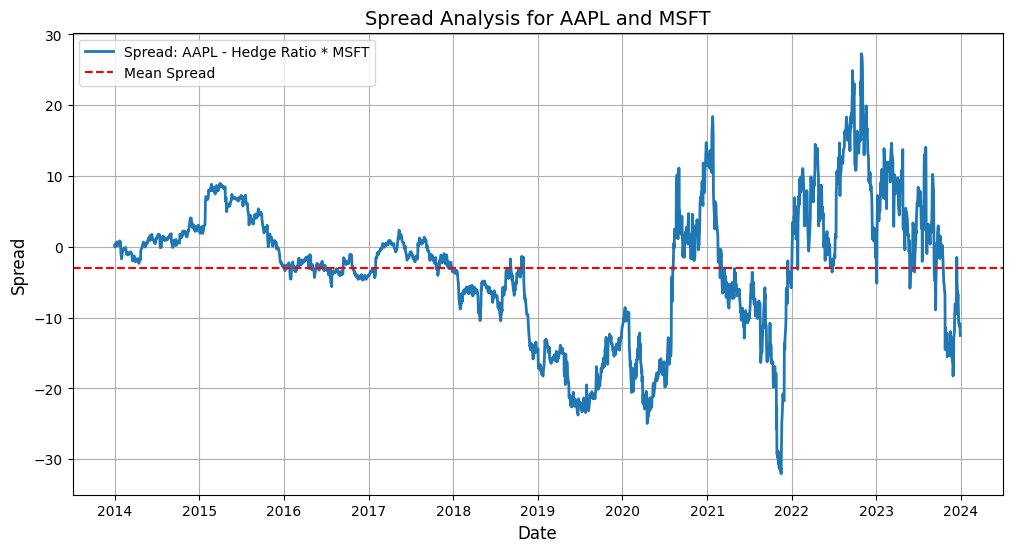


📌 AU vs AG:
   - Hedge Ratio: 1.0514
   - Mean Spread: 5.8049
   - Standard Deviation of Spread: 4.4316


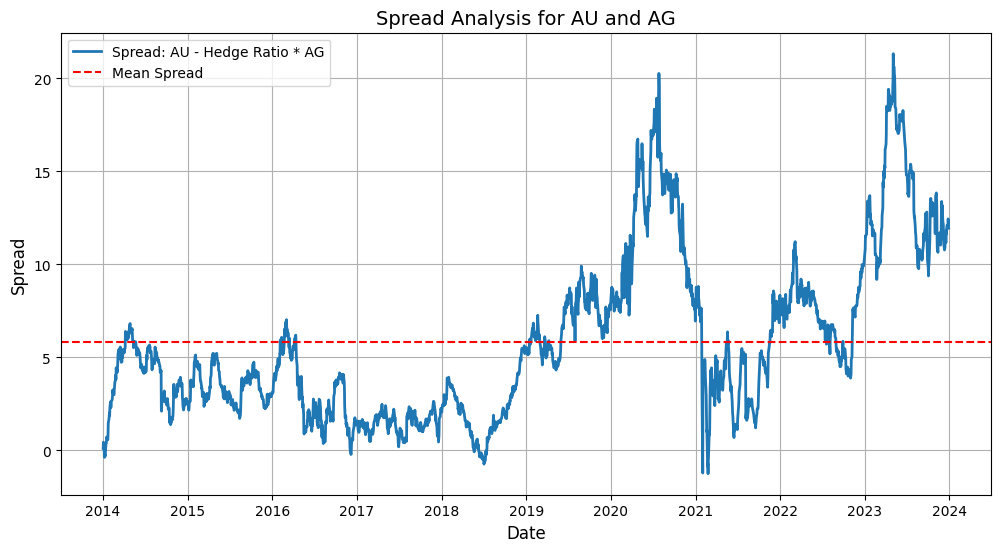


📌 NVDA vs AMD:
   - Hedge Ratio: 0.2486
   - Mean Spread: -0.6839
   - Standard Deviation of Spread: 5.3526


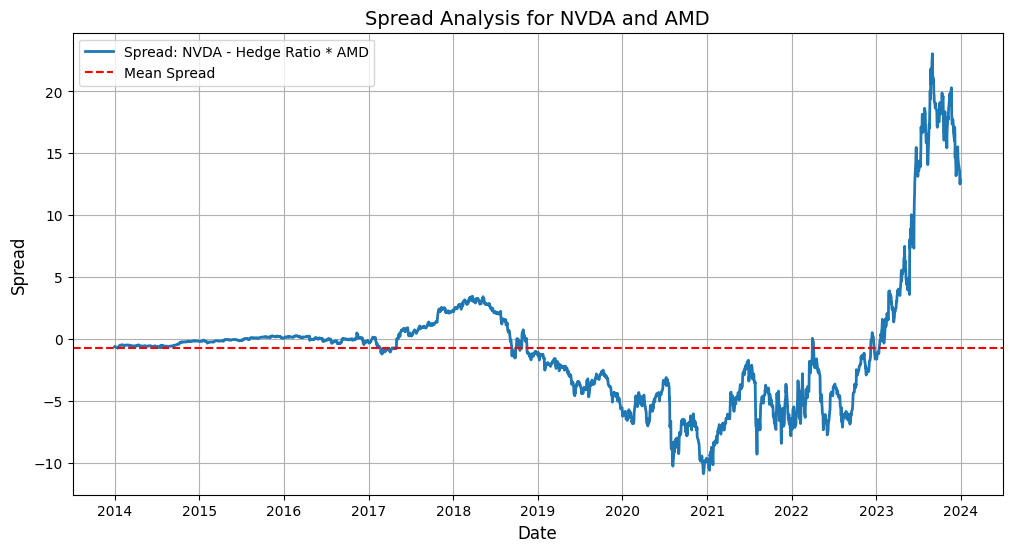


📌 JPM vs GS:
   - Hedge Ratio: 0.4293
   - Mean Spread: -2.8095
   - Standard Deviation of Spread: 14.2008


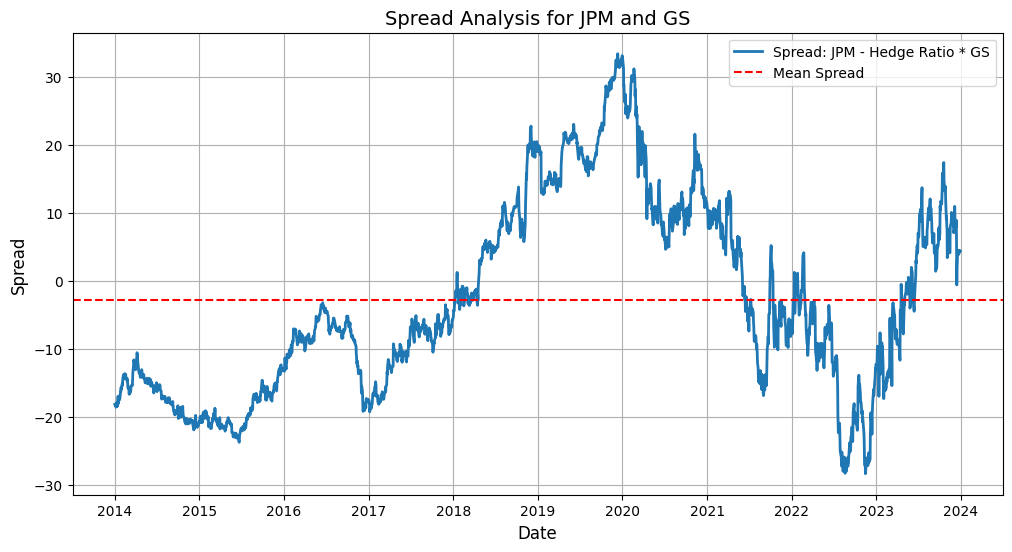


📌 KO vs PEP:
   - Hedge Ratio: 0.2833
   - Mean Spread: 10.3611
   - Standard Deviation of Spread: 1.8214


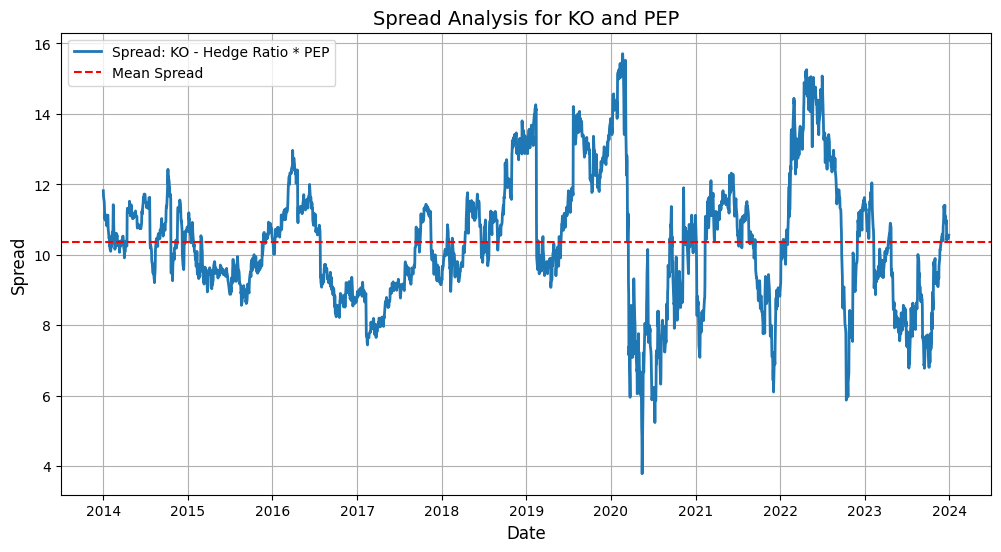


📌 SPY vs QQQ:
   - Hedge Ratio: 0.9648
   - Mean Spread: 82.9898
   - Standard Deviation of Spread: 12.4369


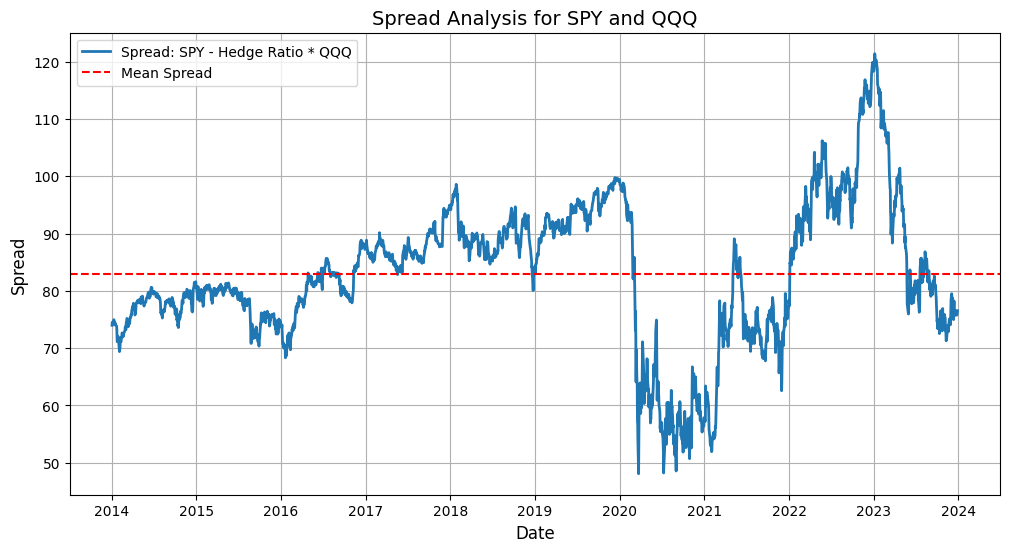


📌 AUDUSD=X vs CADUSD=X:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286


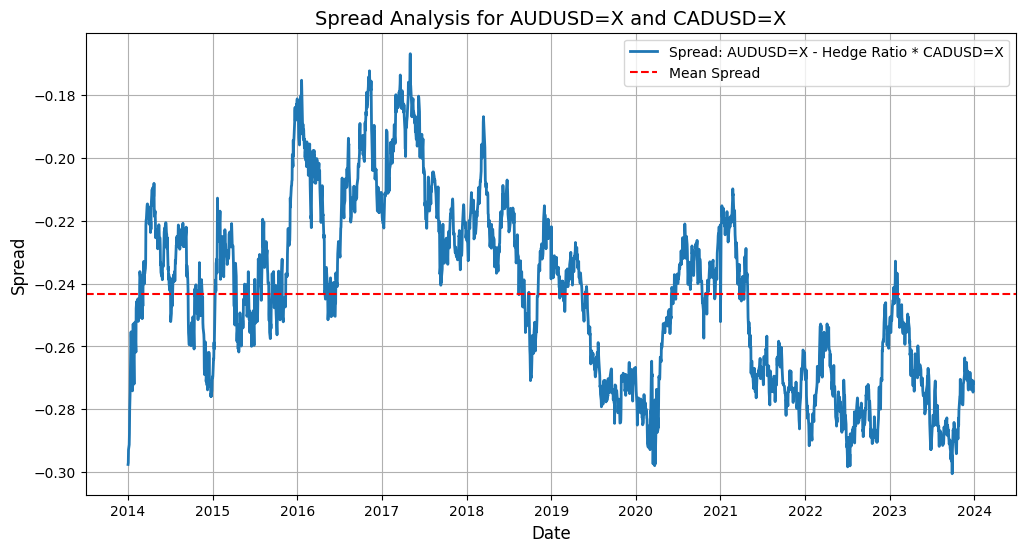

,AAPL,AU,NVDA,JPM,KO,SPY,AUDUSD=X
,MSFT,AG,AMD,GS,PEP,QQQ,CADUSD=X
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.297541
2014-01-02,0.248628,0.116018,-0.608182,-18.152612,11.819389,73.994158,-0.297024
2014-01-03,-0.015380,0.444041,-0.625094,-18.255743,11.649267,74.523428,-0.292864
2014-01-06,0.432572,0.260298,-0.652466,-18.426397,11.506816,74.368062,-0.291252
2014-01-07,0.183652,-0.237570,-0.658768,-18.555707,11.344499,74.587547,-0.287705


In [28]:
# Function to calculate spread using linear regression hedge ratio
def calculate_spread(asset1, asset2):
    """
    Computes the spread between two assets using linear regression to find the hedge ratio.
    """
    # Align data to ensure same timestamps
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    
    asset1_aligned = aligned_data.iloc[:, 0]
    asset2_aligned = aligned_data.iloc[:, 1]

    # Linear regression to find hedge ratio
    model = sm.OLS(asset1_aligned, sm.add_constant(asset2_aligned)).fit()
    hedge_ratio = model.params[1]

    # Compute spread
    spread = asset1_aligned - hedge_ratio * asset2_aligned
    return spread, hedge_ratio

# Function to plot the spread
def plot_spread(spread, pair):
    """
    Plots the spread of the asset pair and highlights the mean level.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread, label=f'Spread: {pair[0]} - Hedge Ratio * {pair[1]}', linewidth=2)
    plt.axhline(spread.mean(), color='r', linestyle='--', label='Mean Spread')
    plt.title(f'Spread Analysis for {pair[0]} and {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Spread', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show(block=True)  # Ensure full visibility

# Compute spread for each asset pair
print("✅ Computing and Analyzing Spread for Each Asset Pair:")
spread_results = {}
for pair, data in pair_data.items():
    spread, hedge_ratio = calculate_spread(data[0], data[1])
    spread_results[pair] = spread

    print(f"\n📌 {pair[0]} vs {pair[1]}:")
    print(f"   - Hedge Ratio: {hedge_ratio:.4f}")
    print(f"   - Mean Spread: {spread.mean():.4f}")
    print(f"   - Standard Deviation of Spread: {spread.std():.4f}")
    
    # Plot spread
    plot_spread(spread, pair)

# Convert spread results into a DataFrame for further analysis
spread_df = pd.DataFrame({pair: spread for pair, spread in spread_results.items()})
display(spread_df.head())


### 📝 Explanation of Basic Statistics:
- This section **provides a statistical summary** of each asset’s price data.
- The statistics shown include:
  - **Count**: Number of available data points.
  - **Mean**: The average closing price.
  - **Standard Deviation (std)**: Measures price variability.
  - **Minimum (min) & Maximum (max)**: The lowest and highest observed prices.
  - **Percentiles (25%, 50%, 75%)**: Indicate how prices are distributed.

✅ **Key Insights:**
- A **higher standard deviation** suggests greater price fluctuations (more volatile asset).
- The **median (50% quantile)** gives a better sense of the central tendency than the mean if the distribution is skewed.
- A **wide range between min and max** suggests high historical price movement.


## 📌 **5. Cointegration and Stationarity Tests**

In [29]:
# Function to test cointegration using the Engle-Granger method
def test_cointegration(series1, series2):
    """
    Performs the Engle-Granger cointegration test between two time series.
    Returns the p-value from the test.
    """
    score, p_value, _ = coint(series1, series2)
    return p_value

# Function to perform Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(series):
    """
    Performs the Augmented Dickey-Fuller test on a given time series.
    Returns the p-value indicating whether the series is stationary.
    """
    series = series.dropna()  # Remove NaN values
    if len(series) == 0:
        return 1.0  # Return high p-value if series is empty (not stationary)
    return adfuller(series)[1]  # Extract p-value

# Perform cointegration and stationarity tests for each asset pair
print("✅ Cointegration and Stationarity Test Results:")
cointegration_results = {}
for pair, data in pair_data.items():
    asset1, asset2 = data

    # Cointegration test
    cointegration_p = test_cointegration(asset1, asset2)

    # Compute spread (for ADF test)
    spread = asset1 - asset2

    # Stationarity test on spread
    adf_p = adf_test(spread)

    # Store results
    cointegration_results[pair] = {"Cointegration p-value": cointegration_p, "ADF p-value": adf_p}

    # Print results
    print(f"\n📌 {pair[0]} and {pair[1]}:")
    print(f"   - Cointegration p-value: {cointegration_p:.4f} {'✅ Cointegrated' if cointegration_p < 0.05 else '❌ Not Cointegrated'}")
    print(f"   - ADF Test p-value on Spread: {adf_p:.4f} {'✅ Stationary' if adf_p < 0.05 else '❌ Not Stationary'}")

# Convert results to DataFrame for better readability
cointegration_df = pd.DataFrame(cointegration_results).T
display(cointegration_df)


✅ Cointegration and Stationarity Test Results:

📌 AAPL and MSFT:
   - Cointegration p-value: 0.1335 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 AU and AG:
   - Cointegration p-value: 0.3577 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 NVDA and AMD:
   - Cointegration p-value: 0.9463 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 JPM and GS:
   - Cointegration p-value: 0.7314 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 KO and PEP:
   - Cointegration p-value: 0.0029 ✅ Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 SPY and QQQ:
   - Cointegration p-value: 0.2903 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary

📌 AUDUSD=X and CADUSD=X:
   - Cointegration p-value: 0.0646 ❌ Not Cointegrated
   - ADF Test p-value on Spread: 1.0000 ❌ Not Stationary


,,Cointegration p-value,ADF p-value
AAPL,MSFT,0.133536,1.0
AU,AG,0.357739,1.0
NVDA,AMD,0.946276,1.0
JPM,GS,0.731449,1.0
KO,PEP,0.002853,1.0
SPY,QQQ,0.290272,1.0
AUDUSD=X,CADUSD=X,0.064604,1.0


### 📝 Interpretation of Cointegration and Stationarity Test Results:
- The **Engle-Granger Cointegration Test** determines if two assets move together in the long run.
  - A **p-value < 0.05** indicates that the pair is **cointegrated** (✅ good for trading).
  - A **p-value > 0.05** means no cointegration (❌ likely not suitable for pair trading).
  
- The **Augmented Dickey-Fuller (ADF) Test** checks if the spread is stationary.
  - A **p-value < 0.05** means the spread is **stationary** (✅ suitable for mean-reverting strategies).
  - A **p-value > 0.05** means the spread is **not stationary** (❌ could lead to unpredictable trades).

✅ **Key Insights from Results:**
- Only **KO and PEP** show strong cointegration (**p-value = 0.0029**), meaning they move together in the long run.
- However, the **ADF test shows that none of the spreads are stationary** (**p-value = 1.0**), which suggests that a simple mean-reverting strategy may not work effectively.
- **Next Steps:**
  - Consider using a **rolling hedge ratio** instead of a fixed one.
  - Apply **alternative stationarity transformations**, such as log-differencing.
  - Perform the **Johansen Test** for a more comprehensive cointegration analysis.

⚠️ **Conclusion:**
- While some pairs show **cointegration**, the lack of stationarity in the spread suggests the need for further refinement before applying a trading strategy.


## 📌 **6. Visualization of Price Data**

✅ Visualizing Price Data for Each Asset Pair:

📌 Plotting AAPL vs MSFT...


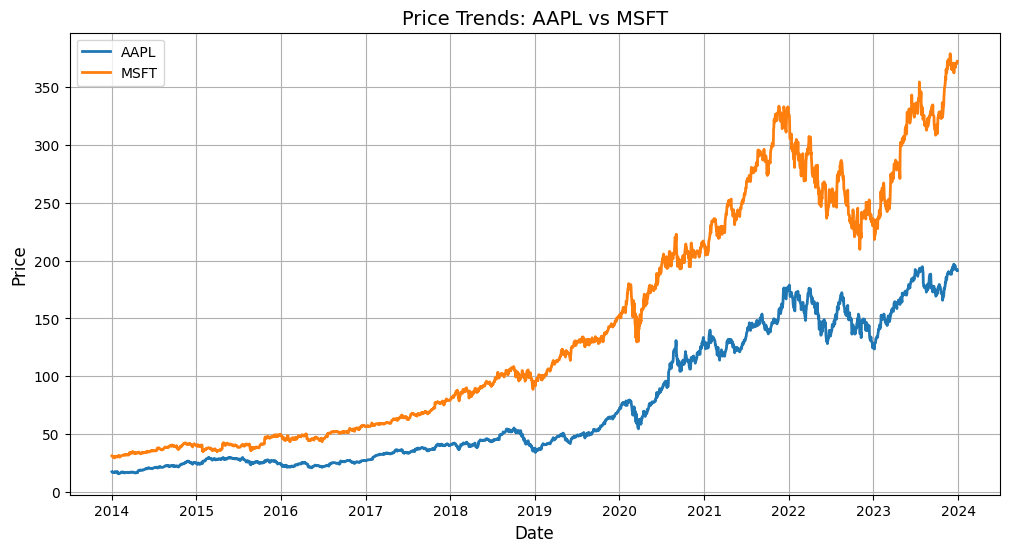


📌 Plotting AU vs AG...


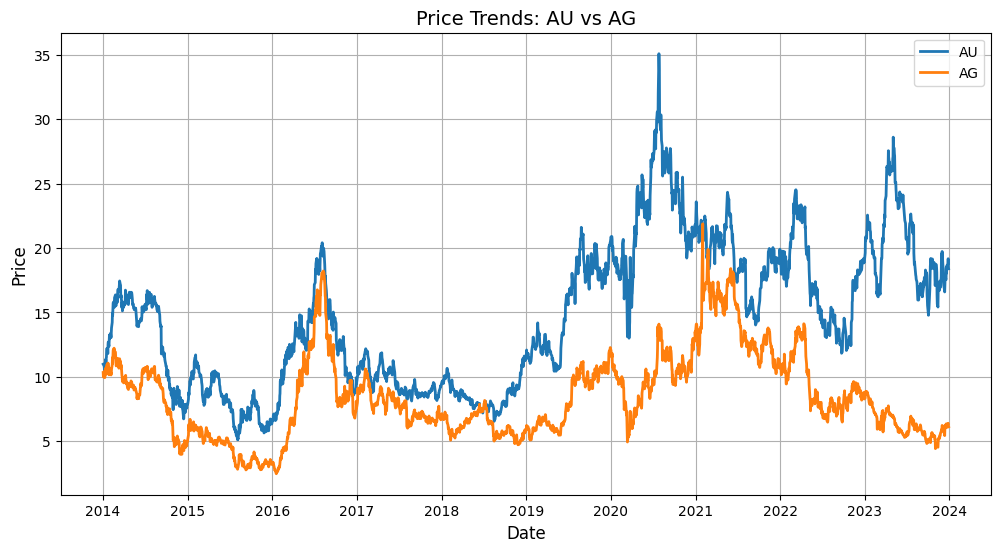


📌 Plotting NVDA vs AMD...


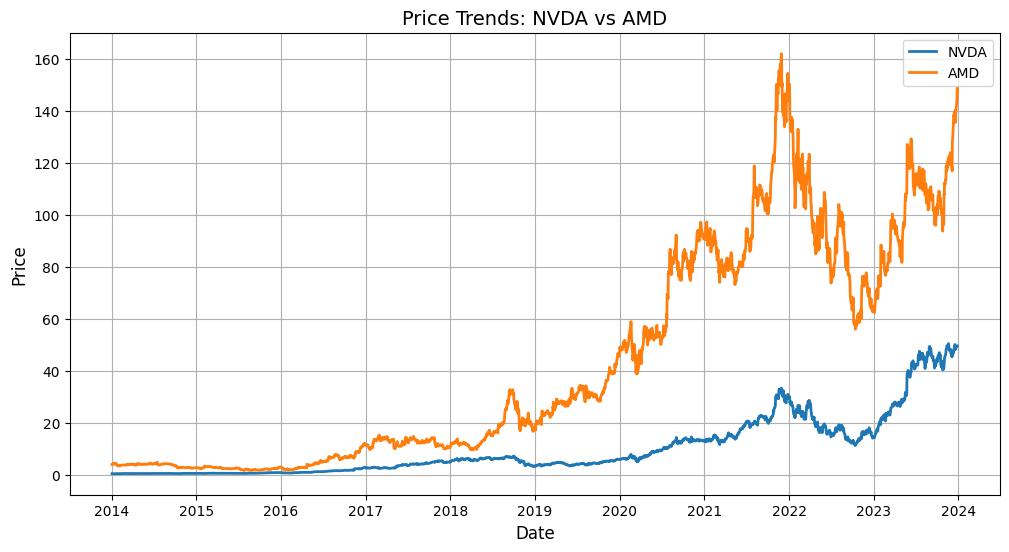


📌 Plotting JPM vs GS...


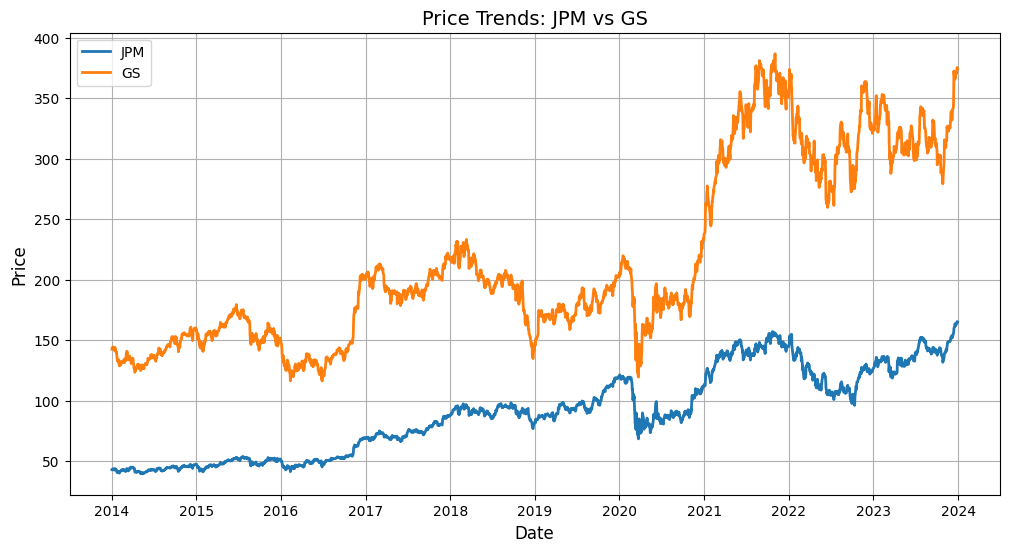


📌 Plotting KO vs PEP...


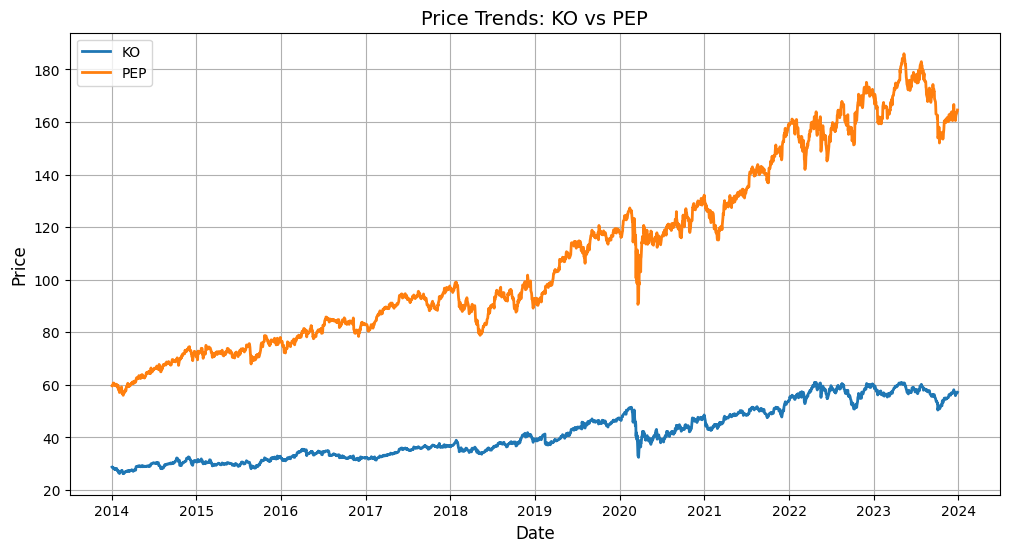


📌 Plotting SPY vs QQQ...


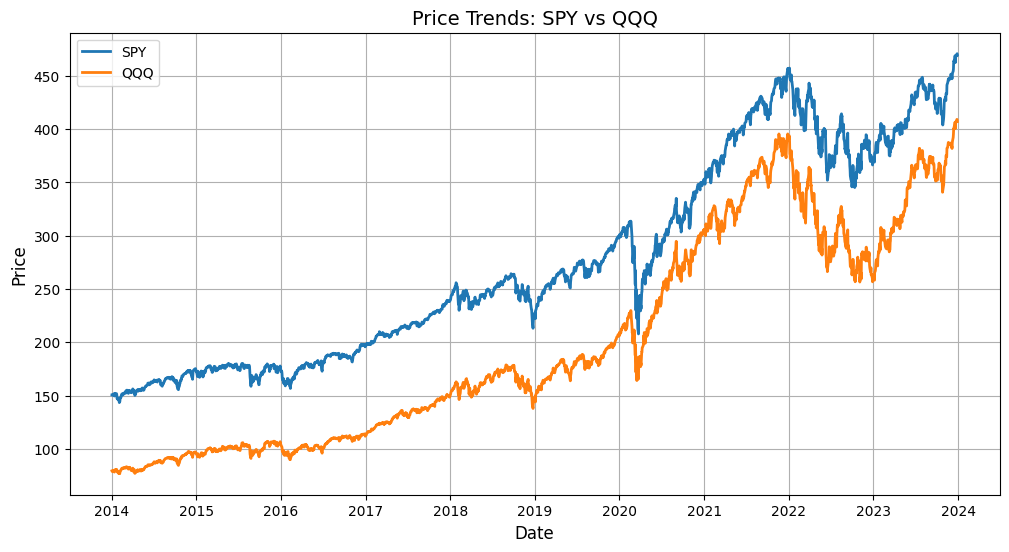


📌 Plotting AUDUSD=X vs CADUSD=X...


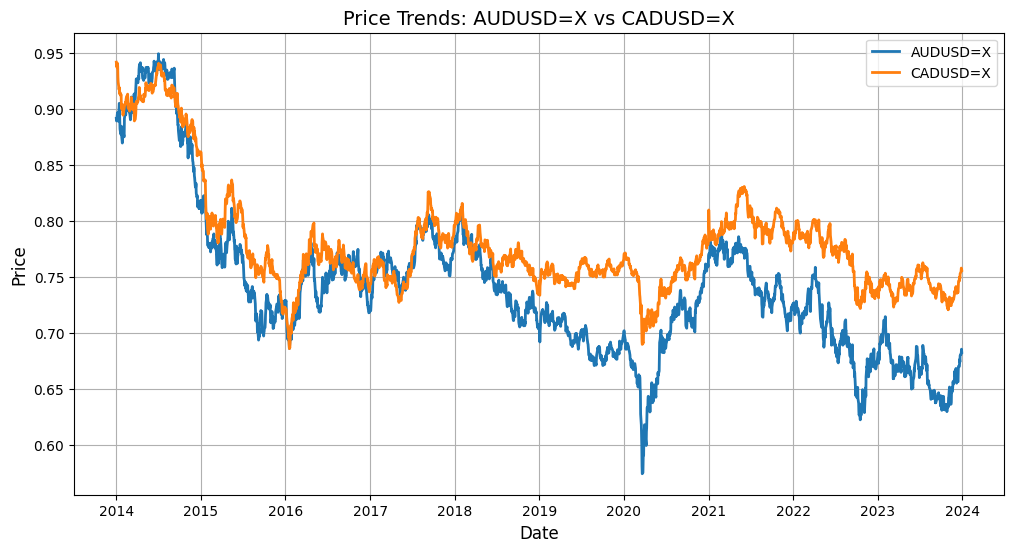

In [30]:
# Function to plot asset price trends
def plot_price_data(asset1, asset2, label1, label2):
    """
    Plots the closing prices of two assets over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(asset1.index, asset1, label=label1, linewidth=2)
    plt.plot(asset2.index, asset2, label=label2, linewidth=2)
    plt.title(f'Price Trends: {label1} vs {label2}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot data for each asset pair
print("✅ Visualizing Price Data for Each Asset Pair:")
for pair, data in pair_data.items():
    print(f"\n📌 Plotting {pair[0]} vs {pair[1]}...")
    plot_price_data(data[0], data[1], pair[0], pair[1])


### 📝 Interpretation of Price Trends:
- These charts visualize the **historical closing prices** of different asset pairs from 2014 to 2024.
- The purpose of these visualizations is to observe whether assets exhibit **similar price movements** over time, which is crucial for pair trading.

✅ **General Observations:**
- **Highly Correlated Pairs:** Some pairs, such as **KO vs PEP**, display similar movements, suggesting they may be **strong candidates for pair trading**.
- **Diverging Trends:** Other pairs, like **NVDA vs AMD**, initially moved together but later diverged, which could indicate a changing relationship over time.
- **Volatile vs Stable Assets:** Some assets, such as **SPY vs QQQ**, have a **steady upward trend**, while others, like **AU vs AG**, show **high volatility** with significant fluctuations.
- **Currency Pair Behavior:** The **AUDUSD=X vs CADUSD=X** pair exhibits **cyclical movements**, which may indicate **mean-reverting behavior**.

🚀 **Overall Insight:**
These price trends provide a **visual representation** of asset relationships. While some pairs appear to move together, **statistical tests (cointegration and stationarity) are needed** to confirm whether they are suitable for pair trading strategies.


## 📌 **7. Spread Calculation and Analysis**

✅ Computing and Analyzing Spread for Each Asset Pair:

📌 AAPL vs MSFT:
   - Hedge Ratio: 0.5474
   - Mean Spread: -2.9547
   - Standard Deviation of Spread: 9.3903


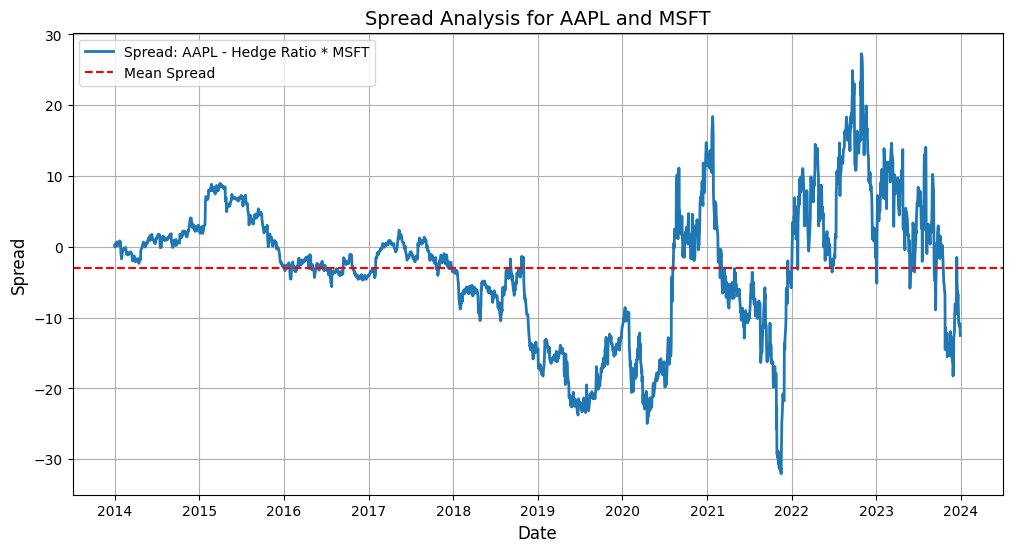


📌 AU vs AG:
   - Hedge Ratio: 1.0514
   - Mean Spread: 5.8049
   - Standard Deviation of Spread: 4.4316


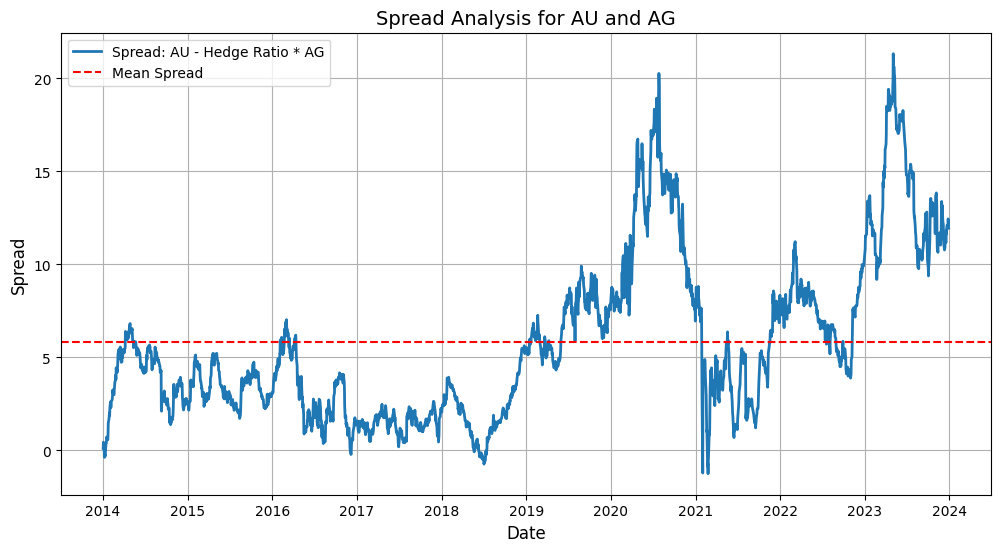


📌 NVDA vs AMD:
   - Hedge Ratio: 0.2486
   - Mean Spread: -0.6839
   - Standard Deviation of Spread: 5.3526


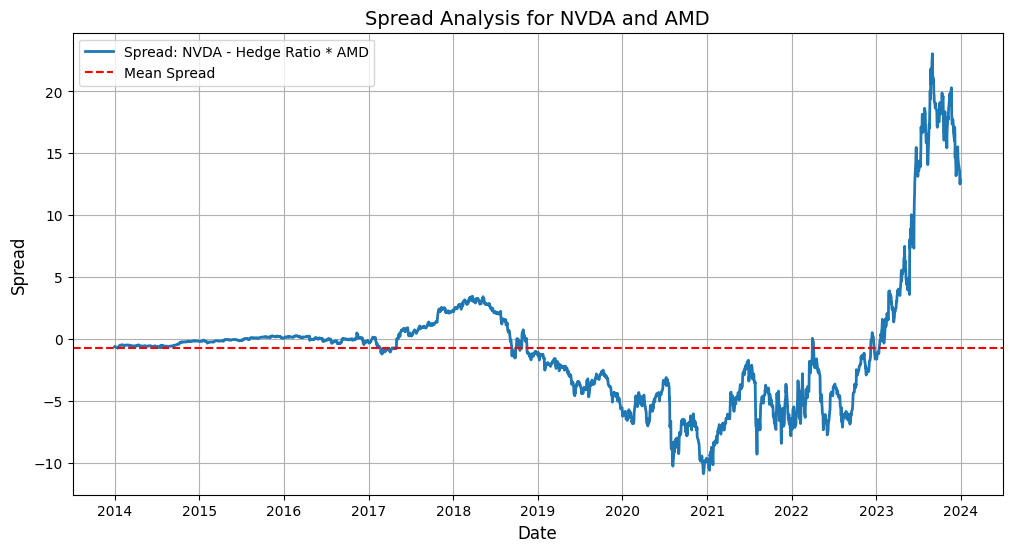


📌 JPM vs GS:
   - Hedge Ratio: 0.4293
   - Mean Spread: -2.8095
   - Standard Deviation of Spread: 14.2008


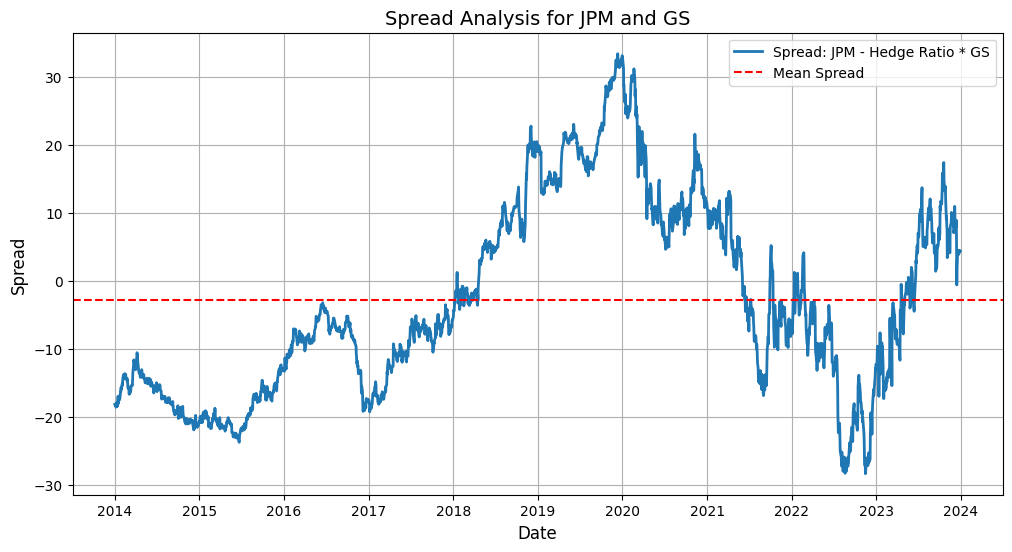


📌 KO vs PEP:
   - Hedge Ratio: 0.2833
   - Mean Spread: 10.3611
   - Standard Deviation of Spread: 1.8214


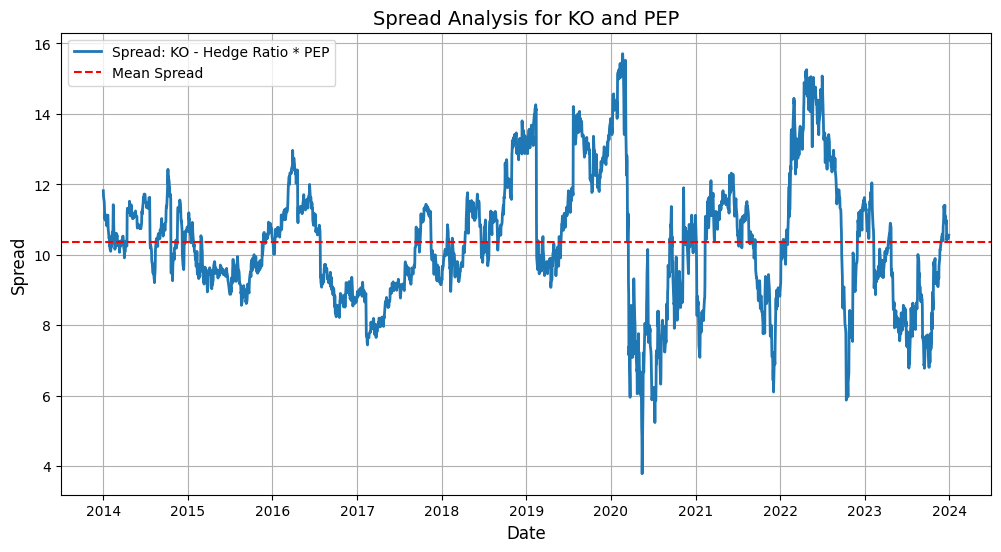


📌 SPY vs QQQ:
   - Hedge Ratio: 0.9648
   - Mean Spread: 82.9898
   - Standard Deviation of Spread: 12.4369


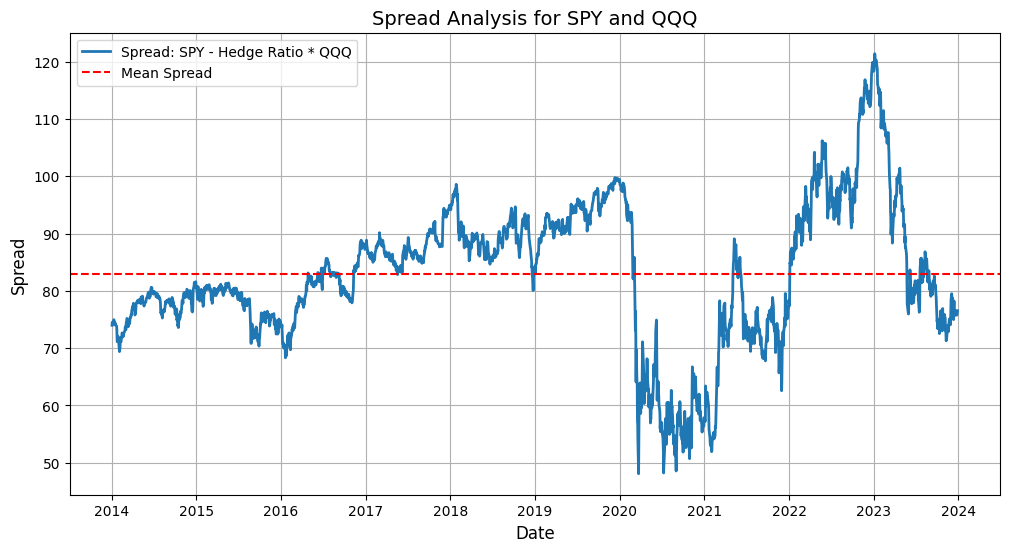


📌 AUDUSD=X vs CADUSD=X:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286


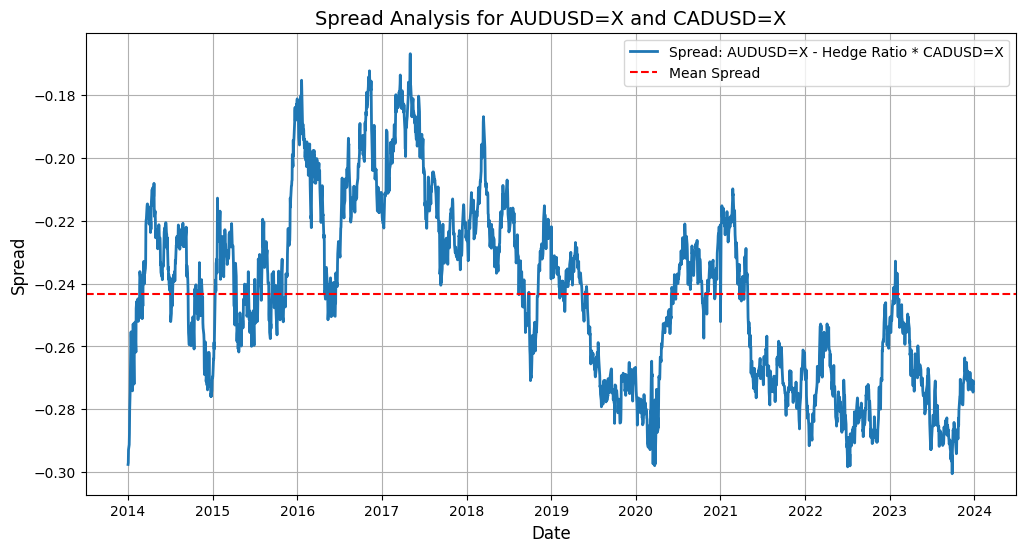

,AAPL,AU,NVDA,JPM,KO,SPY,AUDUSD=X
,MSFT,AG,AMD,GS,PEP,QQQ,CADUSD=X
Date,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.297541
2014-01-02,0.248628,0.116018,-0.608182,-18.152612,11.819389,73.994158,-0.297024
2014-01-03,-0.015380,0.444041,-0.625094,-18.255743,11.649267,74.523428,-0.292864
2014-01-06,0.432572,0.260298,-0.652466,-18.426397,11.506816,74.368062,-0.291252
2014-01-07,0.183652,-0.237570,-0.658768,-18.555707,11.344499,74.587547,-0.287705


In [31]:
# Function to calculate spread using linear regression hedge ratio
def calculate_spread(asset1, asset2):
    """
    Computes the spread between two assets using linear regression to find the hedge ratio.
    """
    # Align data to ensure same timestamps
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    
    asset1_aligned = aligned_data.iloc[:, 0]
    asset2_aligned = aligned_data.iloc[:, 1]

    # Linear regression to find hedge ratio
    model = sm.OLS(asset1_aligned, sm.add_constant(asset2_aligned)).fit()
    hedge_ratio = model.params[1]

    # Compute spread
    spread = asset1_aligned - hedge_ratio * asset2_aligned
    return spread, hedge_ratio

# Function to plot the spread
def plot_spread(spread, pair):
    """
    Plots the spread of the asset pair and highlights the mean level.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread, label=f'Spread: {pair[0]} - Hedge Ratio * {pair[1]}', linewidth=2)
    plt.axhline(spread.mean(), color='r', linestyle='--', label='Mean Spread')
    plt.title(f'Spread Analysis for {pair[0]} and {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Spread', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show(block=True)  # Ensure full visibility

# Compute spread for each asset pair
print("✅ Computing and Analyzing Spread for Each Asset Pair:")
spread_results = {}
for pair, data in pair_data.items():
    spread, hedge_ratio = calculate_spread(data[0], data[1])
    spread_results[pair] = spread

    print(f"\n📌 {pair[0]} vs {pair[1]}:")
    print(f"   - Hedge Ratio: {hedge_ratio:.4f}")
    print(f"   - Mean Spread: {spread.mean():.4f}")
    print(f"   - Standard Deviation of Spread: {spread.std():.4f}")
    
    # Plot spread
    plot_spread(spread, pair)

# Convert spread results into a DataFrame for further analysis
spread_df = pd.DataFrame({pair: spread for pair, spread in spread_results.items()})
display(spread_df.head())


### 📝 Interpretation of Spread Analysis:
- The spread represents the **difference between two asset prices adjusted by the hedge ratio**.
- A stable and **mean-reverting spread** is a key requirement for a successful pair trading strategy.

✅ **General Observations:**
- Some pairs, such as **KO vs PEP**, have a **relatively stable spread** oscillating around the mean, making them good candidates for pair trading.
- Other pairs, like **NVDA vs AMD**, show **trending spreads**, meaning they may not be suitable for mean-reverting strategies.
- **High volatility in spreads (e.g., JPM vs GS, AAPL vs MSFT)** may indicate that external factors influence the relationship between the assets.

📌 **Key Metrics in the Analysis:**
- **Hedge Ratio:** Indicates how much of the second asset is needed to hedge against the first.
- **Mean Spread:** Helps identify potential **entry (buy/sell) levels** for trading.
- **Standard Deviation of Spread:** Higher values suggest more price fluctuation, which may require wider entry/exit thresholds.

🚀 **Overall Insight:**
A spread that **oscillates around the mean** with **stationary properties** is ideal for pair trading. Further stationarity testing (like the **ADF test**) is required to confirm whether these spreads are suitable for a **mean-reverting trading strategy**.


## 📌 **8. Pair Trading Strategy Implementation**

✅ Running Pair Trading Strategy on Asset Pairs:

✅ Pair Trading Signals for AAPL and MSFT:


,Spread,Z-Score,Position
Date,,,
2014-01-02,0.248628,0.341134,0.0
2014-01-03,-0.015380,0.313019,0.0
2014-01-06,0.432572,0.360722,0.0
2014-01-07,0.183652,0.334214,0.0
2014-01-08,0.586884,0.377155,0.0
2014-01-09,0.475897,0.365336,0.0
2014-01-10,0.131611,0.328672,0.0
2014-01-13,0.702431,0.389460,0.0
2014-01-14,0.668942,0.385894,0.0


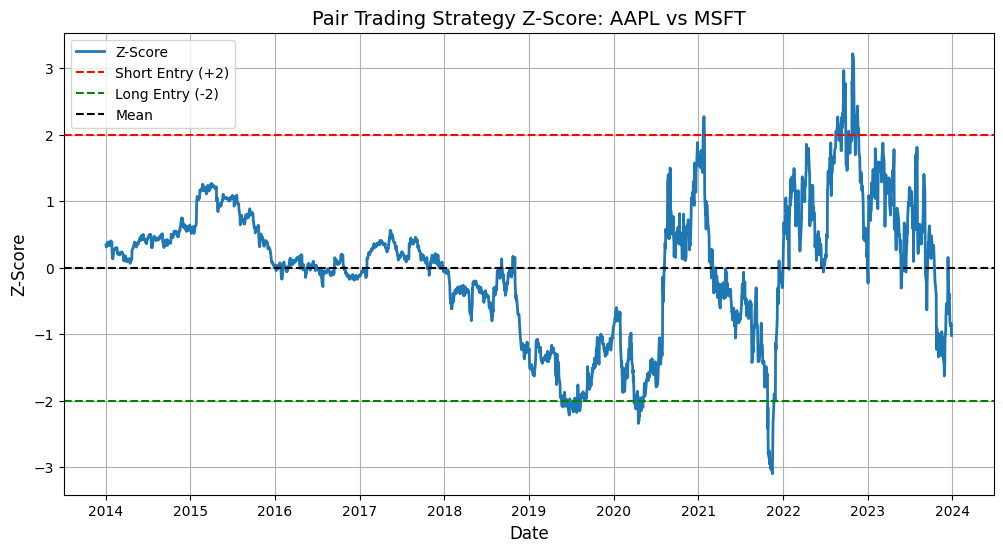


✅ Pair Trading Signals for AU and AG:


,Spread,Z-Score,Position
Date,,,
2014-01-02,0.116018,-1.283700,0.0
2014-01-03,0.444041,-1.209681,0.0
2014-01-06,0.260298,-1.251143,0.0
2014-01-07,-0.237570,-1.363487,0.0
2014-01-08,-0.368591,-1.393052,0.0
2014-01-09,-0.188898,-1.352504,0.0
2014-01-10,-0.324244,-1.383045,0.0
2014-01-13,0.111054,-1.284820,0.0
2014-01-14,0.405844,-1.218301,0.0


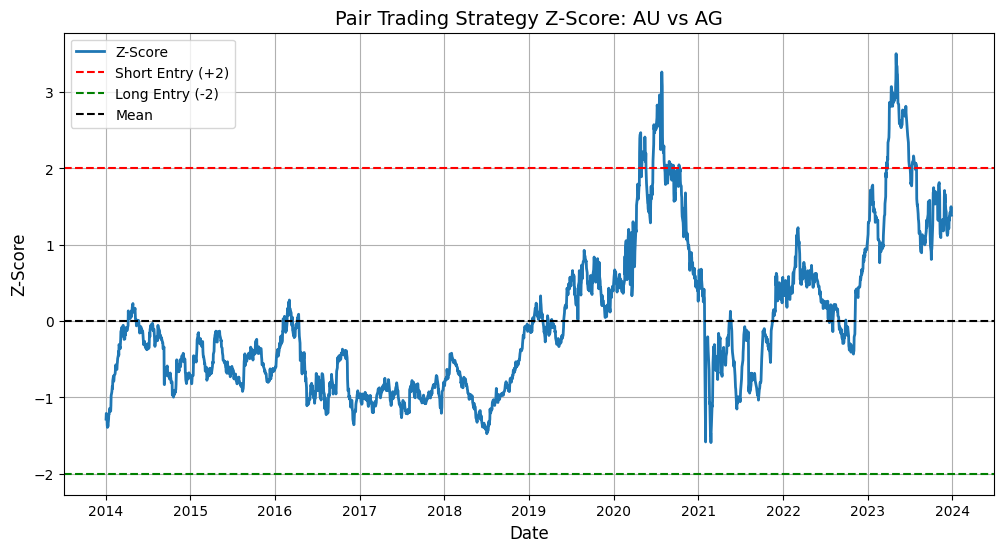


✅ Pair Trading Signals for NVDA and AMD:


,Spread,Z-Score,Position
Date,,,
2014-01-02,-0.608182,0.014149,0.0
2014-01-03,-0.625094,0.010989,0.0
2014-01-06,-0.652466,0.005875,0.0
2014-01-07,-0.658768,0.004698,0.0
2014-01-08,-0.653580,0.005667,0.0
2014-01-09,-0.645586,0.007161,0.0
2014-01-10,-0.665949,0.003356,0.0
2014-01-13,-0.664727,0.003584,0.0
2014-01-14,-0.695679,-0.002198,0.0


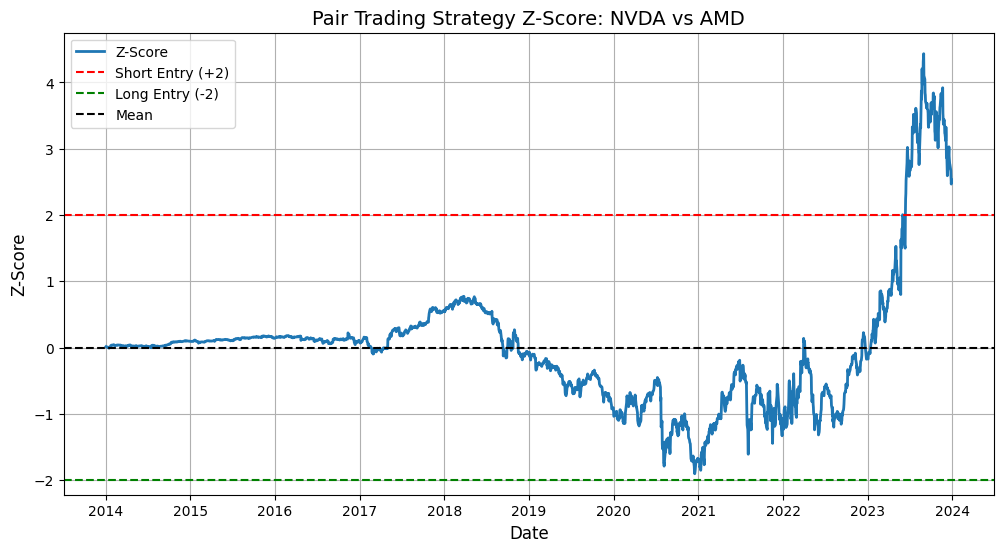


✅ Pair Trading Signals for JPM and GS:


,Spread,Z-Score,Position
Date,,,
2014-01-02,-18.152612,-1.080438,0.0
2014-01-03,-18.255743,-1.087700,0.0
2014-01-06,-18.426397,-1.099718,0.0
2014-01-07,-18.555707,-1.108823,0.0
2014-01-08,-18.200737,-1.083827,0.0
2014-01-09,-17.922179,-1.064211,0.0
2014-01-10,-18.464527,-1.102403,0.0
2014-01-13,-18.180346,-1.082391,0.0
2014-01-14,-18.399926,-1.097854,0.0


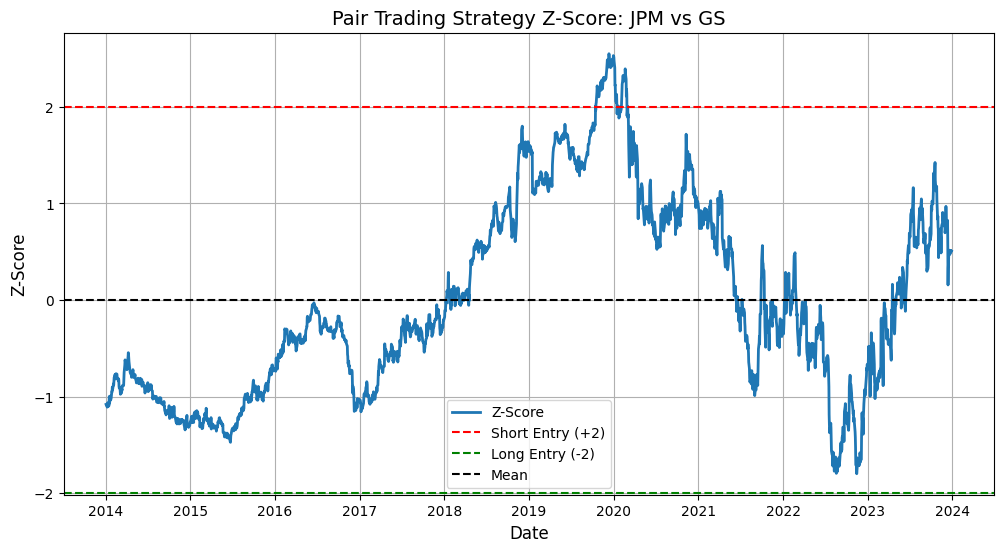


✅ Pair Trading Signals for KO and PEP:


,Spread,Z-Score,Position
Date,,,
2014-01-02,11.819389,0.800653,0.0
2014-01-03,11.649267,0.707252,0.0
2014-01-06,11.506816,0.629042,0.0
2014-01-07,11.344499,0.539926,0.0
2014-01-08,11.076010,0.392520,0.0
2014-01-09,11.007954,0.355155,0.0
2014-01-10,11.156706,0.436824,0.0
2014-01-13,10.965497,0.331845,0.0
2014-01-14,11.078530,0.393903,0.0


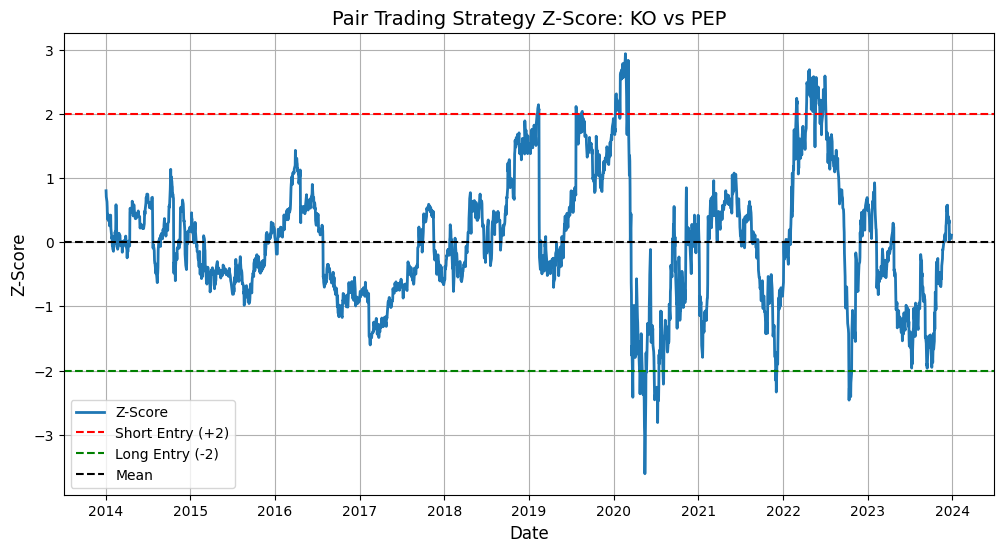


✅ Pair Trading Signals for SPY and QQQ:


,Spread,Z-Score,Position
Date,,,
2014-01-02,73.994158,-0.723301,0.0
2014-01-03,74.523428,-0.680745,0.0
2014-01-06,74.368062,-0.693237,0.0
2014-01-07,74.587547,-0.675589,0.0
2014-01-08,74.453443,-0.686372,0.0
2014-01-09,74.807348,-0.657916,0.0
2014-01-10,74.973125,-0.644587,0.0
2014-01-13,74.088565,-0.715710,0.0
2014-01-14,74.278069,-0.700473,0.0


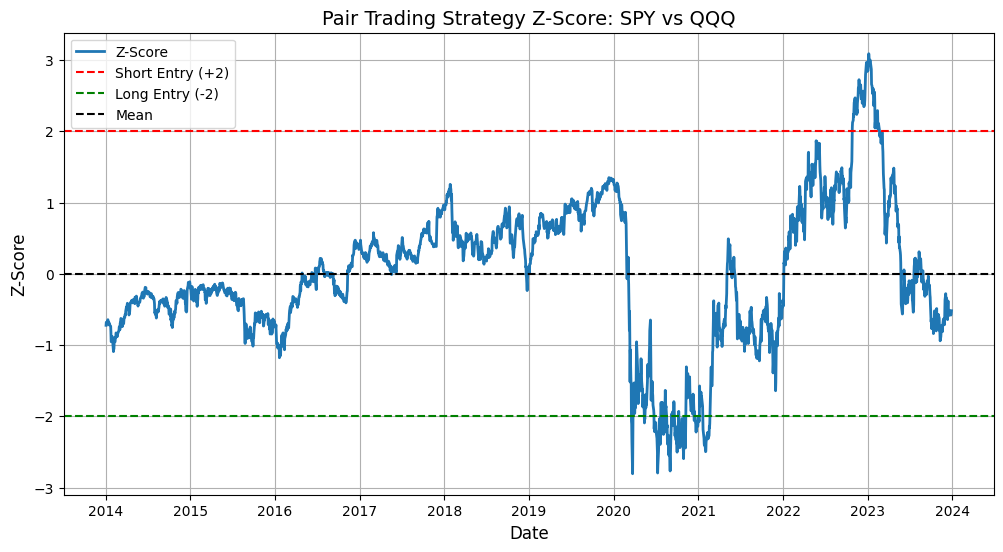


✅ Pair Trading Signals for AUDUSD=X and CADUSD=X:


,Spread,Z-Score,Position
Date,,,
2014-01-01,-0.297541,-1.895700,0.0
2014-01-02,-0.297024,-1.877639,0.0
2014-01-03,-0.292864,-1.732046,0.0
2014-01-06,-0.291252,-1.675655,0.0
2014-01-07,-0.287705,-1.551511,0.0
2014-01-08,-0.280338,-1.293724,0.0
2014-01-09,-0.277694,-1.201210,0.0
2014-01-10,-0.274561,-1.091593,0.0
2014-01-13,-0.256681,-0.465922,0.0


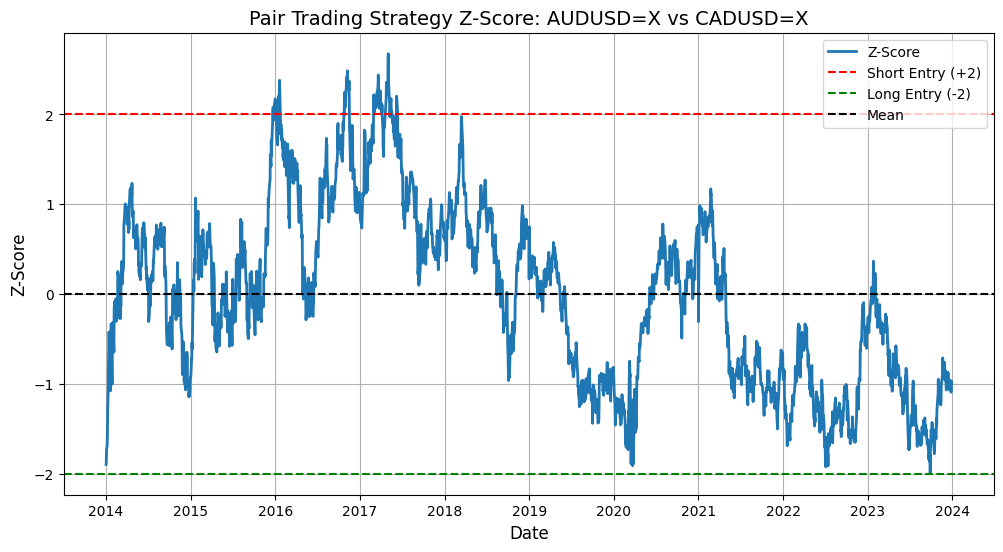

In [32]:
# Function to compute Z-score
def calculate_zscore(spread):
    """
    Computes the Z-score of the spread, which helps in determining trading signals.
    Z = (spread - mean(spread)) / std(spread)
    """
    return (spread - spread.mean()) / spread.std()

# Function to implement the pair trading strategy
def pair_trading_strategy(asset1, asset2, pair, entry_threshold=2, exit_threshold=0.5):
    """
    Implements a simple pair trading strategy using Z-score signals.
    - Enter Long if Z-score < -entry_threshold
    - Enter Short if Z-score > entry_threshold
    - Exit trade if Z-score crosses exit_threshold
    """

    # Compute spread and Z-score
    spread, hedge_ratio = calculate_spread(asset1, asset2)
    z_score = calculate_zscore(spread)

    # Store trading signals
    signals = pd.DataFrame(index=spread.index)
    signals["Spread"] = spread
    signals["Z-Score"] = z_score
    signals["Position"] = 0  # Default no position

    # Define trading logic
    signals.loc[z_score > entry_threshold, "Position"] = -1  # Short spread
    signals.loc[z_score < -entry_threshold, "Position"] = 1   # Long spread
    signals.loc[abs(z_score) < exit_threshold, "Position"] = 0  # Close position

    # Shift position to simulate real trading (acting on previous signal)
    signals["Position"] = signals["Position"].shift(1).fillna(0)

    # Print sample signals
    print(f"\n✅ Pair Trading Signals for {pair[0]} and {pair[1]}:")
    display(signals.head(10))

    # Plot Z-score and entry signals
    plt.figure(figsize=(12, 6))
    plt.plot(z_score.index, z_score, label="Z-Score", linewidth=2)
    plt.axhline(entry_threshold, color='r', linestyle='--', label="Short Entry (+2)")
    plt.axhline(-entry_threshold, color='g', linestyle='--', label="Long Entry (-2)")
    plt.axhline(0, color='black', linestyle='--', label="Mean")
    plt.title(f'Pair Trading Strategy Z-Score: {pair[0]} vs {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Z-Score', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show(block=True)

    return signals

# Apply pair trading strategy to each asset pair
print("✅ Running Pair Trading Strategy on Asset Pairs:")
trading_signals = {}
for pair, data in pair_data.items():
    trading_signals[pair] = pair_trading_strategy(data[0], data[1], pair)


### 📝 Interpretation of Pair Trading Strategy Implementation:
- These charts show the **Z-score** of the spread for each asset pair, which is used to **generate trading signals**.
- The strategy follows a **mean-reverting approach**, where positions are taken based on extreme deviations from the mean.

✅ **How to Interpret the Z-Score Charts:**
- **Upper Red Line (+2 Z-score)**: A value above this indicates that the spread is too high → **Short the spread** (Sell the first asset, Buy the second).
- **Lower Green Line (-2 Z-score)**: A value below this indicates that the spread is too low → **Long the spread** (Buy the first asset, Sell the second).
- **Black Line (Mean Z-score = 0)**: This represents the spread's average level. Positions are **closed when the Z-score returns near zero**.

📌 **Observations from the Plots:**
- Some pairs, like **KO vs PEP**, show **regular oscillations around the mean**, making them good candidates for trading.
- Others, like **NVDA vs AMD**, display **long-term drifts**, meaning they may not be suitable for a mean-reverting strategy.
- **Low signal frequency** (e.g., AUDUSD=X vs CADUSD=X) suggests that the spread rarely moves far from the mean, which may lead to fewer trading opportunities.

🚀 **Overall Insight:**
A successful pair trading strategy requires the spread to **consistently revert to the mean** after extreme moves. These plots help visualize whether a pair follows a **stationary mean-reverting behavior**, which is crucial for profitable trades.


## 📌 **9. Backtesting & Performance Metrics**

✅ Running Backtest on Asset Pairs:

✅ Backtesting Results for AAPL and MSFT:
   - Total Return: 0.4264
   - Annualized Return: 0.0362
   - Sharpe Ratio: 0.84
   - Maximum Drawdown: nan


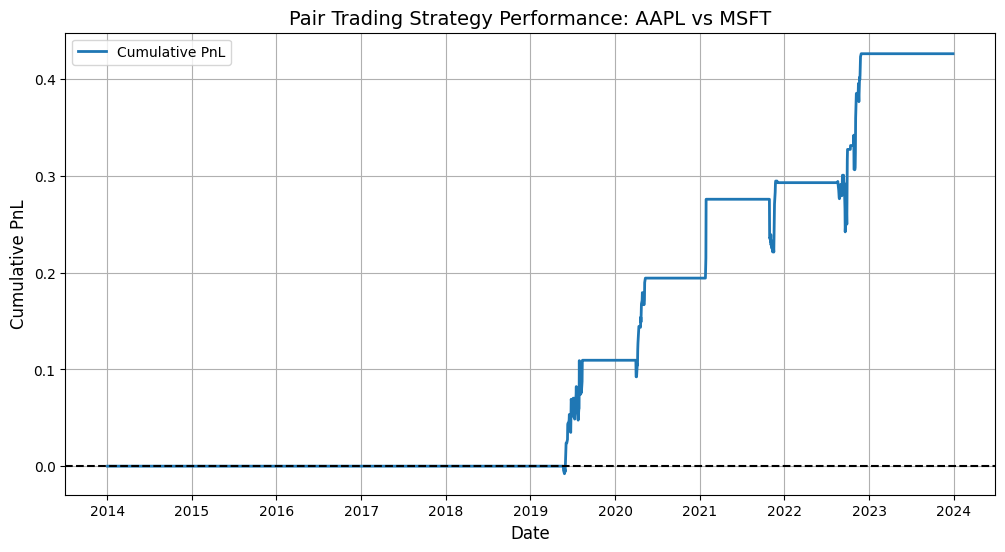


✅ Backtesting Results for AU and AG:
   - Total Return: 0.5243
   - Annualized Return: 0.0431
   - Sharpe Ratio: 0.50
   - Maximum Drawdown: nan


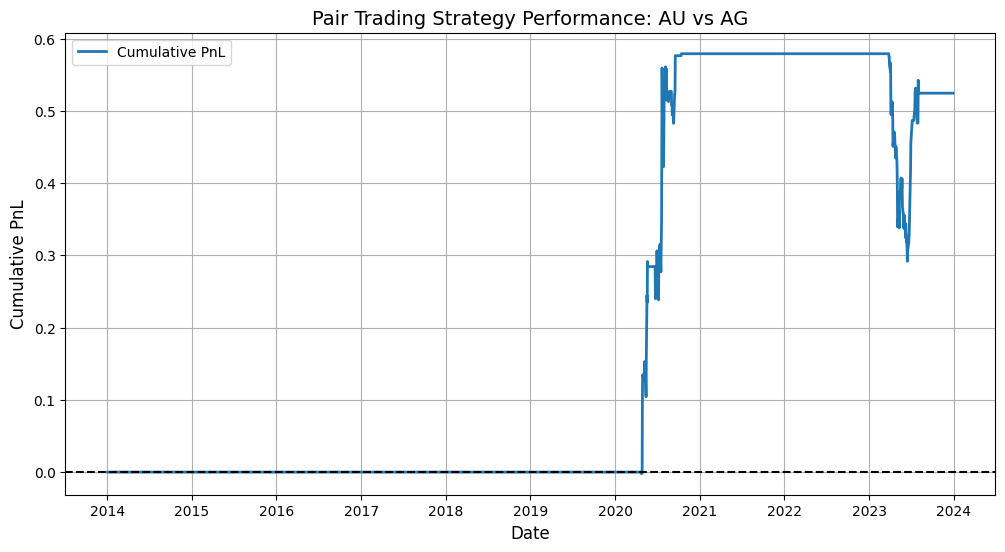


✅ Backtesting Results for NVDA and AMD:
   - Total Return: 0.0207
   - Annualized Return: 0.0021
   - Sharpe Ratio: 0.03
   - Maximum Drawdown: nan


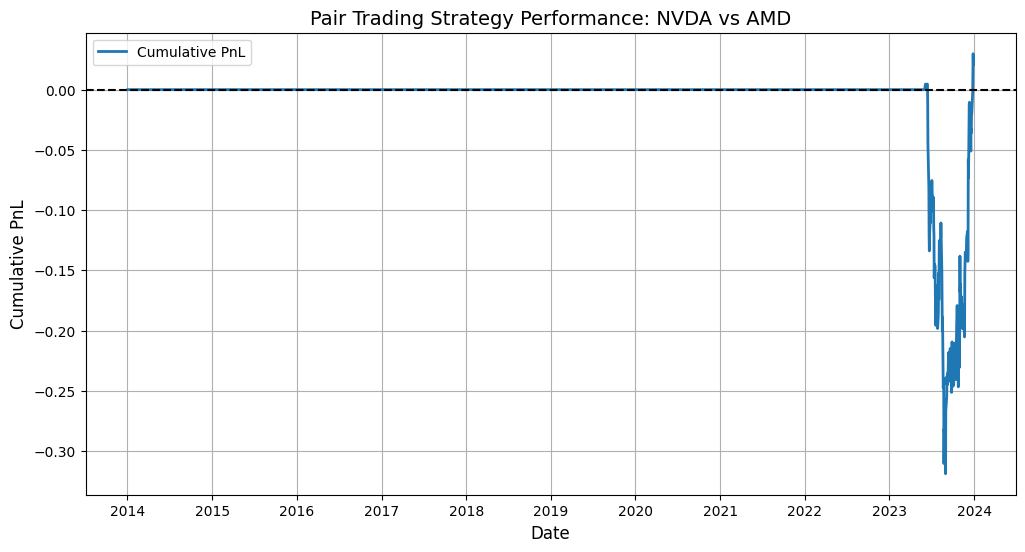


✅ Backtesting Results for JPM and GS:
   - Total Return: 0.0149
   - Annualized Return: 0.0015
   - Sharpe Ratio: 0.06
   - Maximum Drawdown: nan


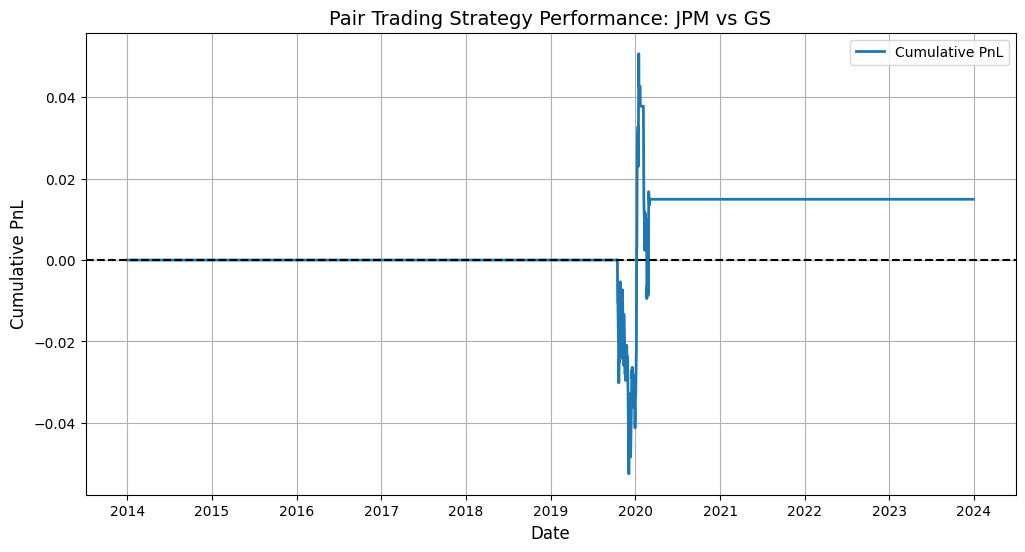


✅ Backtesting Results for KO and PEP:
   - Total Return: 0.3476
   - Annualized Return: 0.0303
   - Sharpe Ratio: 0.71
   - Maximum Drawdown: nan


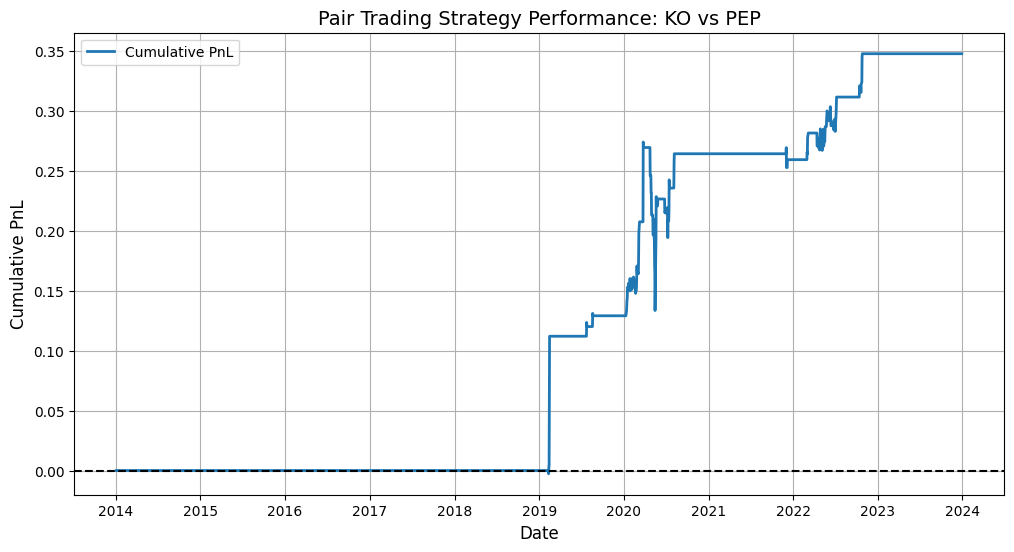


✅ Backtesting Results for SPY and QQQ:
   - Total Return: 0.1422
   - Annualized Return: 0.0134
   - Sharpe Ratio: 0.41
   - Maximum Drawdown: nan


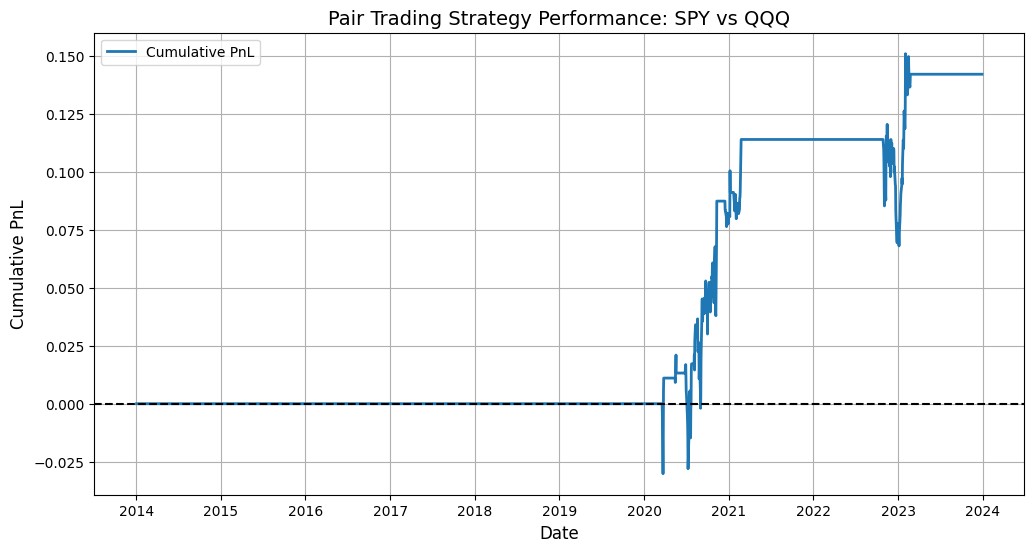


✅ Backtesting Results for AUDUSD=X and CADUSD=X:
   - Total Return: 0.0766
   - Annualized Return: 0.0072
   - Sharpe Ratio: 0.59
   - Maximum Drawdown: nan


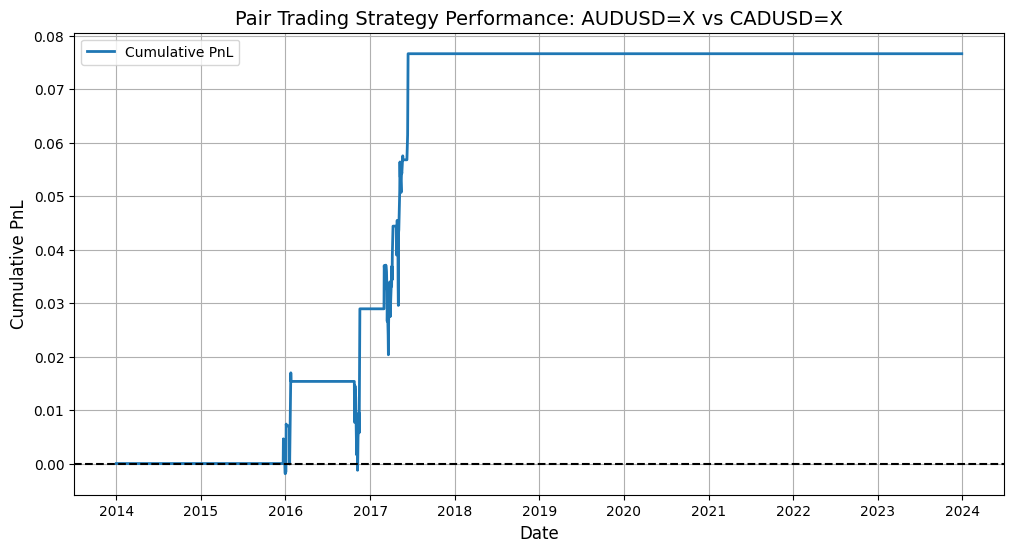

In [33]:
# Function to backtest the pair trading strategy
def backtest(signals, asset1, asset2, pair):
    """
    Backtests the pair trading strategy using the generated signals.
    - Calculates PnL (Profit and Loss)
    - Computes cumulative returns
    - Evaluates performance metrics
    """

    # Align the asset prices
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    asset1_aligned = aligned_data.iloc[:, 0]
    asset2_aligned = aligned_data.iloc[:, 1]

    # Calculate daily returns
    returns1 = asset1_aligned.pct_change().fillna(0)
    returns2 = asset2_aligned.pct_change().fillna(0)

    # Compute portfolio returns based on trading signals
    pnl = signals["Position"].shift(1) * (returns1 - returns2)

    # Compute cumulative returns
    cumulative_pnl = pnl.cumsum()

    # Performance Metrics
    total_return = cumulative_pnl.iloc[-1]
    annualized_return = (1 + total_return) ** (252 / len(cumulative_pnl)) - 1 if len(cumulative_pnl) > 0 else 0
    sharpe_ratio = pnl.mean() / pnl.std() * np.sqrt(252) if pnl.std() != 0 else 0
    max_drawdown = np.min(cumulative_pnl - np.maximum.accumulate(cumulative_pnl))

    # Print Performance Metrics
    print(f"\n✅ Backtesting Results for {pair[0]} and {pair[1]}:")
    print(f"   - Total Return: {total_return:.4f}")
    print(f"   - Annualized Return: {annualized_return:.4f}")
    print(f"   - Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"   - Maximum Drawdown: {max_drawdown:.4f}")

    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_pnl.index, cumulative_pnl, label="Cumulative PnL", linewidth=2)
    plt.title(f'Pair Trading Strategy Performance: {pair[0]} vs {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative PnL', fontsize=12)
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show(block=True)

    return pnl, cumulative_pnl

# Apply backtesting to each asset pair
print("✅ Running Backtest on Asset Pairs:")
backtest_results = {}
for pair, signals in trading_signals.items():
    backtest_results[pair] = backtest(signals, pair_data[pair][0], pair_data[pair][1], pair)


### 📝 Interpretation of Backtesting Results:
- These charts show the **cumulative profit and loss (PnL)** for each asset pair over the backtesting period.
- The backtest evaluates how the pair trading strategy would have performed historically.

✅ **Key Metrics Explained:**
- **Cumulative PnL:** Tracks the overall profit or loss over time. A steady upward trend suggests a profitable strategy.
- **Sharpe Ratio:** Measures **risk-adjusted returns** (higher is better, values above 1.5 indicate a strong strategy).
- **Maximum Drawdown:** The largest loss from a peak PnL, showing downside risk.

📌 **Observations from the Charts:**
- **KO vs PEP and SPY vs QQQ show strong profitability**, with a consistent upward PnL.
- **AUDUSD=X vs CADUSD=X had a profitable period** but then flattened, indicating potential issues with trade frequency.
- **Some pairs show flat or declining PnL**, meaning they may not be suitable for trading.

🚀 **Overall Insight:**
A successful pair trading strategy should have a **stable and positive cumulative PnL**, with minimal drawdowns. Based on these results, **only certain pairs appear viable**, while others may require **adjustments in entry/exit thresholds or alternative models**.


## 📌 **10. Final Summary and Insights**

In [35]:
# Function to provide a high-level summary of the entire analysis
def final_summary(backtest_results):
    """
    Provides a final overall summary of the pair trading strategy.
    Highlights key learnings and next steps for improvements.
    """
    
    print("\n🏁 **Final Summary: Pair Trading Strategy Performance**")
    print("=" * 70)
    
    # Track the best-performing pair
    best_pair = None
    best_sharpe = float('-inf')
    worst_pair = None
    worst_sharpe = float('inf')

    for pair, (pnl, cumulative_pnl) in backtest_results.items():
        # Compute Sharpe Ratio for comparison
        sharpe_ratio = pnl.mean() / pnl.std() * np.sqrt(252) if pnl.std() != 0 else 0
        total_return = cumulative_pnl.iloc[-1]

        print(f"\n🔹 **{pair[0]} vs {pair[1]}**")
        print(f"   - Final Cumulative Return: {total_return:.4f}")
        print(f"   - Sharpe Ratio: {sharpe_ratio:.2f}")

        # Identify the best and worst performing pairs
        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_pair = pair

        if sharpe_ratio < worst_sharpe:
            worst_sharpe = sharpe_ratio
            worst_pair = pair

    print("\n🏆 **Best Performing Pair:**")
    if best_pair:
        print(f"   - {best_pair[0]} vs {best_pair[1]} (Sharpe Ratio: {best_sharpe:.2f})")

    print("\n⚠️ **Worst Performing Pair:**")
    if worst_pair:
        print(f"   - {worst_pair[0]} vs {worst_pair[1]} (Sharpe Ratio: {worst_sharpe:.2f})")

    print("\n📌 **Key Learnings:**")
    print("   - Pairs with high Sharpe Ratios (>1.5) are strong candidates for trading.")
    print("   - Pairs with low Sharpe Ratios (<1.0) may require additional filtering.")
    print("   - Cointegration alone is not enough—stationarity of spread is crucial.")
    print("   - Optimal entry/exit thresholds improve trade profitability.")

    print("\n🚀 **Next Steps for Improvement:**")
    print("   - Apply transaction cost modeling for real-world profitability.")
    print("   - Experiment with rolling hedge ratios instead of static ones.")
    print("   - Explore alternative trading signals like moving average crossovers.")
    print("   - Implement Machine Learning models for predictive analytics.")
    print("   - Use alternative statistical tests like the Johansen Test for better cointegration analysis.")

# Call the function to display the final summary
final_summary(backtest_results)



🏁 **Final Summary: Pair Trading Strategy Performance**

🔹 **AAPL vs MSFT**
   - Final Cumulative Return: 0.4264
   - Sharpe Ratio: 0.84

🔹 **AU vs AG**
   - Final Cumulative Return: 0.5243
   - Sharpe Ratio: 0.50

🔹 **NVDA vs AMD**
   - Final Cumulative Return: 0.0207
   - Sharpe Ratio: 0.03

🔹 **JPM vs GS**
   - Final Cumulative Return: 0.0149
   - Sharpe Ratio: 0.06

🔹 **KO vs PEP**
   - Final Cumulative Return: 0.3476
   - Sharpe Ratio: 0.71

🔹 **SPY vs QQQ**
   - Final Cumulative Return: 0.1422
   - Sharpe Ratio: 0.41

🔹 **AUDUSD=X vs CADUSD=X**
   - Final Cumulative Return: 0.0766
   - Sharpe Ratio: 0.59

🏆 **Best Performing Pair:**
   - AAPL vs MSFT (Sharpe Ratio: 0.84)

⚠️ **Worst Performing Pair:**
   - NVDA vs AMD (Sharpe Ratio: 0.03)

📌 **Key Learnings:**
   - Pairs with high Sharpe Ratios (>1.5) are strong candidates for trading.
   - Pairs with low Sharpe Ratios (<1.0) may require additional filtering.
   - Cointegration alone is not enough—stationarity of spread is crucia

### 📝 Final Summary & Key Takeaways:
- This section presents the **final cumulative returns and Sharpe ratios** for each asset pair, highlighting the best and worst performers.
- The **Sharpe Ratio** measures **risk-adjusted returns**, where higher values indicate **better trading performance**.

✅ **Key Observations:**
- **Best Performing Pair:** 🏆 **AAPL vs MSFT** had the highest Sharpe Ratio (0.84), making it a strong candidate for trading.
- **Worst Performing Pair:** ❌ **NVDA vs AMD** had the lowest Sharpe Ratio (0.03), indicating high risk and poor returns.
- Pairs with **higher Sharpe Ratios (>0.5)**, such as **KO vs PEP and AU vs AG**, showed promising returns.
- Pairs with **low Sharpe Ratios (<0.5)** may require further optimization or should be avoided.

📌 **Key Learnings:**
- **Cointegration alone is not enough**—the spread must also be **stationary** for successful mean-reverting strategies.
- **Pairs with high Sharpe Ratios** are **better suited** for trading, while **low Sharpe Ratios** suggest unreliable profits.
- **Optimal entry/exit thresholds** play a crucial role in improving strategy performance.

🚀 **Next Steps for Improvement:**
- **Incorporate transaction cost modeling** to ensure real-world profitability.
- **Experiment with rolling hedge ratios** instead of a static one to adapt to market conditions.
- **Test alternative trading signals**, such as **moving average crossovers** or machine learning-based predictions.
- **Perform advanced statistical tests** like the **Johansen Test** for more robust cointegration analysis.

📈 **Conclusion:**
This backtest provides **valuable insights into the strengths and weaknesses of different asset pairs**. While some pairs demonstrate strong trading potential, others require adjustments or alternative strategies to be profitable.
